In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
import json
import pandas as pd
import copy
import sys
from glob import glob
from copy import deepcopy
%run ./result_summary.ipynb
%run ./plot_functions.ipynb
sys.path.insert(0, '../src/')


output_path =  ../output/figures
plt = single_column_plt_params(plt)
plt = double_column_plt_params(plt)


In [2]:
from analyze_utilities import *
from dataset_utilities import create_cifar10_dataloaders
from distributions_metrics import *
plt = single_column_plt_params(plt)


Files already downloaded and verified
Files already downloaded and verified


# ODIN Baseline


ODIN:
   AUROC  AP-In  AP-Out  KL Divergence  KL in P_lamb
0  0.989  0.989   0.989          0.542         0.139


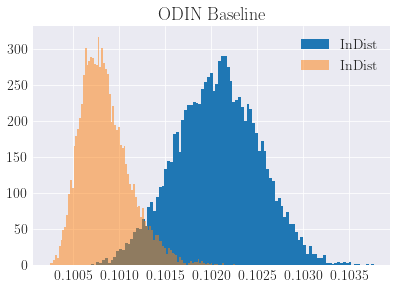

In [3]:
# ODIN baseline: with pNML fraemwork
file_baseline_cifar10 = '../output/baseline_odin_densenet_cifar10_cifar10_20190926_184650/results_baseline_odin_densenet_cifar10_cifar10_20190926_184650.json'
file_baseline_isun = '../output/baseline_odin_densenet_cifar10_isun_20190926_184648/results_baseline_odin_densenet_cifar10_isun_20190926_184648.json'

with open(file_baseline_cifar10) as data_file:
    ind_df = result_dict_to_erm_df(json.load(data_file), is_out_of_dist=True)
ind_df = ind_df.add_prefix('erm_')
ind_df.index = ind_df.index.astype(int)
ind_df_odin = ind_df.sort_index()
print()
with open(file_baseline_isun) as data_file:
    ood_df = result_dict_to_erm_df(json.load(data_file), is_out_of_dist=True)
ood_df = ood_df.add_prefix('erm_')
ood_df.index = ood_df.index.astype(int)
ood_df_odin = ood_df.sort_index()

# Baseline Max prob of ERM
y_score_ind = ind_df_odin[['erm_' + str(x) for x in range(10)]].max(axis=1).tolist() + \
    ood_df_odin[['erm_' + str(x) for x in range(10)]].max(axis=1).tolist()
y_true_ind = [True] * ind_df_odin.shape[0] + [False] * ood_df_odin.shape[0]
baseline_performance = calc_performance_in_out_dist(y_true_ind, y_score_ind)

y_score_ind = np.array(y_score_ind)
y_true_ind = np.array(y_true_ind)

print('ODIN:')
print(baseline_performance.round(3))

bins = 100
plt.hist(y_score_ind[y_true_ind], bins=bins, label='InDist')
plt.hist(y_score_ind[np.logical_not(y_true_ind)],
         alpha=0.5, bins=bins,  label='InDist')
plt.title('ODIN Baseline')
plt.legend()
plt.show()


# pNML

In [4]:
files_cifar10 = ['../output/densenet_cifar10_cifar10_20190921_092958/results_densenet_cifar10_cifar10_20190921_092958.json',
                 '../output/densenet_cifar10_cifar10_20190921_093000/results_densenet_cifar10_cifar10_20190921_093000.json',
                 '../output/densenet_cifar10_cifar10_20190921_093010/results_densenet_cifar10_cifar10_20190921_093010.json',
                 '../output/densenet_cifar10_cifar10_20190921_093012/results_densenet_cifar10_cifar10_20190921_093012.json',
                 # with odin as preprocess
                 '../output/densenet_cifar10_cifar10_20190926_195316/results_densenet_cifar10_cifar10_20190926_195316.json',
                 '../output/step_size_5_densenet_cifar10_cifar10_20190927_065133/results_step_size_5_densenet_cifar10_cifar10_20190927_065133.json',
                 ]
files_isun = ['../output/densenet_cifar10_isun_20190921_092724/results_densenet_cifar10_isun_20190921_092724.json',
              '../output/densenet_cifar10_isun_20190921_092729/results_densenet_cifar10_isun_20190921_092729.json',
              '../output/densenet_cifar10_isun_20190921_092732/results_densenet_cifar10_isun_20190921_092732.json',
              '../output/densenet_cifar10_isun_20190921_092734/results_densenet_cifar10_isun_20190921_092734.json',
              # with odin as preprocess
              '../output/densenet_cifar10_isun_20190926_195315/results_densenet_cifar10_isun_20190926_195315.json',
              '../output/step_size_5_densenet_cifar10_isun_20190927_065129/results_step_size_5_densenet_cifar10_isun_20190927_065129.json',
              ]

epochs_list = [6, 8, 10, 12]  # , 'Odin', 'step_size']

In [5]:
files_cifar10 = ['../output/layer_2_densenet_cifar10_cifar10_20190927_092106/results_layer_2_densenet_cifar10_cifar10_20190927_092106.json',
                 '../output/layer_2_densenet_cifar10_cifar10_20190927_092108/results_layer_2_densenet_cifar10_cifar10_20190927_092108.json'
                 ]
files_isun = ['../output/layer_2_densenet_cifar10_isun_20190927_092550/results_layer_2_densenet_cifar10_isun_20190927_092550.json',
              '../output/layer_2_densenet_cifar10_isun_20190927_092844/results_layer_2_densenet_cifar10_isun_20190927_092844.json',
              ]

epochs_list = ['preprocess true', 'preprocess false']

In [6]:
files_cifar10 = ['../output/layer_2_densenet_cifar10_cifar10_20190927_092106/results_layer_2_densenet_cifar10_cifar10_20190927_092106.json',
                 '../output/layer_2_densenet_cifar10_cifar10_20190927_092108/results_layer_2_densenet_cifar10_cifar10_20190927_092108.json'
                 ]
files_isun = ['../output/layer_2_densenet_cifar10_isun_20190927_092550/results_layer_2_densenet_cifar10_isun_20190927_092550.json',
              '../output/layer_2_densenet_cifar10_isun_20190927_092844/results_layer_2_densenet_cifar10_isun_20190927_092844.json',
              ]

epochs_list = ['preprocess true', 'preprocess false']

In [7]:

# files_cifar10 = ['../output/bathc_1_densenet_cifar10_cifar10_20190928_085719/results_bathc_1_densenet_cifar10_cifar10_20190928_085719.json',
#                  '../output/batches_10_densenet_cifar10_cifar10_20190928_091529/results_batches_10_densenet_cifar10_cifar10_20190928_091529.json',
#                   '../output/layer_2_densenet_cifar10_cifar10_20190927_092108/results_layer_2_densenet_cifar10_cifar10_20190927_092108.json'
#                  ]
# files_isun = ['../output/batch_1_densenet_cifar10_isun_20190928_085720/results_batch_1_densenet_cifar10_isun_20190928_085720.json',
#               '../output/batches_10_densenet_cifar10_isun_20190928_091530/results_batches_10_densenet_cifar10_isun_20190928_091530.json',
#                '../output/layer_2_densenet_cifar10_isun_20190927_092844/results_layer_2_densenet_cifar10_isun_20190927_092844.json'
#               ]

# epochs_list = ['batch 1', 'batch 10', 'org']

In [8]:
files_cifar10 = ['../output/densenet_cifar10_cifar10_20190928_134307/results_*.json',
                 '../output/densenet_cifar10_cifar10_20190928_134707/results_*.json',
                 '../output/densenet_cifar10_cifar10_20190928_135308/results_*.json'
                 ]
files_cifar10 = [y for x in files_cifar10 for y in glob(x)]
files_isun = ['../output/densenet_cifar10_isun_20190928_134407/results_*.json',
              '../output/densenet_cifar10_isun_20190928_135007/results_*.json',
              '../output/densenet_cifar10_isun_20190928_135608/results_*.json'
              ]
files_isun = [y for x in files_isun for y in glob(x)]

experimnet_name = 'Two layers 10 batches'

In [9]:
files_cifar10 = ['../output/batch_1_densenet_cifar10_cifar10_20190928_164505/results_*.json',
                 '../output/batch_1_densenet_cifar10_cifar10_20190928_164906/results_*.json',
                 '../output/batch_1_densenet_cifar10_cifar10_20190928_165506/results_*.json'
                 ]
files_cifar10 = [y for x in files_cifar10 for y in glob(x)]
files_isun = ['../output/batch_1_densenet_cifar10_isun_20190928_164605/results_*.json',
              '../output/batch_1_densenet_cifar10_isun_20190928_165206/results_*.json',
              '../output/batch_1_densenet_cifar10_isun_20190928_165806/results_*.json'
              ]
files_isun = [y for x in files_isun for y in glob(x)]

experimnet_name = 'Two layers 1 batches'

In [26]:
files_cifar10 = ['../output/reset_fc_densenet_cifar10_cifar10_*/results_*.json'
                 ]
files_cifar10 = [y for x in files_cifar10 for y in glob(x)]
files_isun = ['../output/reset_fc_densenet_cifar10_isun_*/results_*.json'
              ]
files_isun = [y for x in files_isun for y in glob(x)]

experimnet_name = 'Reset FC. Train 10 ecpohs'


In [29]:
files_cifar10 = ['../output/fc2_densenet_cifar10_cifar10_*/results_*.json'
                 ]
files_cifar10 = [y for x in files_cifar10 for y in glob(x)]
files_isun = ['../output/fc2_densenet_cifar10_isun_*/results_*.json'
              ]
files_isun = [y for x in files_isun for y in glob(x)]

experimnet_name = 'Added 2 fc layers and reset it'


Added 2 fc layers and reset it

Added 2 fc layers and reset it
Cifar10: loaded 359 keys. Mean regret 0.124
                   nml       erm     genie
acc           0.969359  0.116992  0.994429
mean loss     0.137148  0.996838  0.012879
std loss      0.285717  0.057353  0.148188
mean entropy  0.198722  0.996027  0.013030
ood 362 keys. Mean regret 0.719


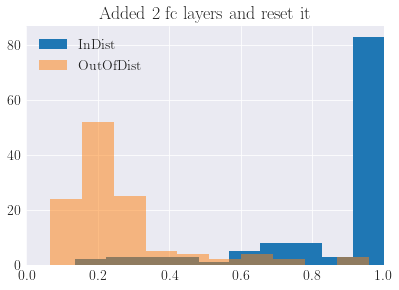

        AUROC  AP-In  AP-Out  KL Divergence  KL in P_lamb
Regret  0.965   0.97   0.957          4.068         0.735


In [30]:
ooo_dataset = 'isun'
print(experimnet_name)
print()

ind_df, statistic_cifar10 = load_results_to_df(files_cifar10)
ind_df.index = ind_df.index.astype(int)
ind_df = ind_df.sort_index()
ind_indexes = ind_df.index
print('Cifar10: loaded {} keys. Mean regret {:.3f}'.format(
    ind_df.shape[0], ind_df['log10_norm_factor'].mean()))
print(statistic_cifar10)
ood_df, statistic_noise = load_results_to_df(files_isun, is_out_of_dist=True)
ood_df.index = ood_df.index.astype(int)
ood_df = ood_df.sort_index()
ood_indexes = ood_df.index
print('ood {} keys. Mean regret {:.3f}' .format(
    ood_df.shape[0], ood_df['log10_norm_factor'].mean()))

# Reduce to the minumum
testset_size = min(len(ind_df), len(ood_df))
ind_df = ind_df.loc[:testset_size]
ood_df = ood_df.loc[:testset_size]

# Regret based
y_score_ind = (1-ind_df['log10_norm_factor']).tolist() + \
    (1-ood_df['log10_norm_factor']).tolist()
y_true_ind = [True] * ind_df.shape[0] + [False] * ood_df.shape[0]

pnml_performance = calc_performance_in_out_dist(y_true_ind, y_score_ind)
pnml_performance = pnml_performance.rename(index={0: 'Regret'})

y_score_ind_regret = np.array(y_score_ind)
y_true_ind_regret = np.array(y_true_ind)

# Summary
plt.hist(y_score_ind_regret[y_true_ind_regret], label='InDist')
plt.hist(y_score_ind_regret[np.logical_not(
    y_true_ind_regret)], alpha=0.5, label='OutOfDist')
plt.legend()
plt.xlim(0, 1)
plt.title(experimnet_name)
plt.show()

print(pnml_performance.round(3))


      AUROC  AP-In  AP-Out  KL Divergence  KL in P_lamb
ODIN  0.986  0.987   0.987          1.291         0.142


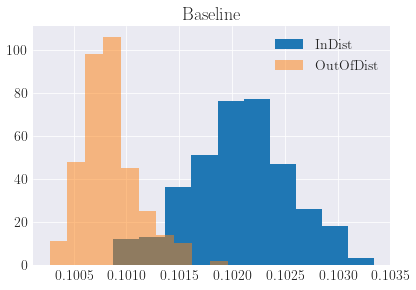

In [31]:
# Baseline Max prob of ERM
ind_df_odin_sub = ind_df_odin.loc[ind_indexes]
ood_df_odin_sub = ood_df_odin.loc[ind_indexes]

y_score_ind_baseline = ind_df_odin_sub[['erm_' + str(x) for x in range(10)]].max(
    axis=1).tolist() + ood_df_odin_sub[['erm_' + str(x) for x in range(10)]].max(axis=1).tolist()
y_true_ind_baseline = [
    True] * ind_df_odin_sub.shape[0] + [False] * ood_df_odin_sub.shape[0]
baseline_performance = calc_performance_in_out_dist(
    y_true_ind_baseline, y_score_ind_baseline)
baseline_performance = baseline_performance.rename(index={0: 'ODIN'})


# Summary
print(baseline_performance.round(3))

y_score_ind_baseline = np.array(y_score_ind_baseline)
y_true_ind_baseline = np.array(y_true_ind_baseline)
plt.hist(y_score_ind_baseline[y_true_ind_baseline], label='InDist')
plt.hist(y_score_ind_baseline[np.logical_not(
    y_true_ind_baseline)], alpha=0.5, label='OutOfDist')
plt.legend()
plt.title('Baseline')
plt.show()


In [32]:
len(y_score_ind_baseline)

718

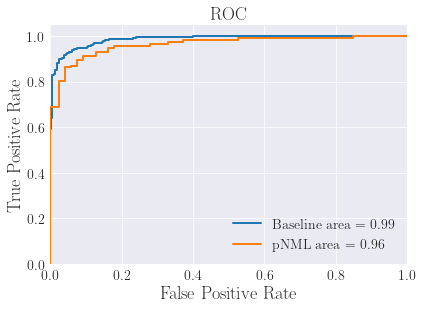

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
y_score = y_score_ind_baseline
y_test = y_true_ind_baseline

fpr = dict()
tpr = dict()
roc_auc = dict()

# for i in range(n_classes):
i = 0
fpr[i], tpr[i], _ = roc_curve(y_true_ind_baseline, y_score_ind_baseline)
roc_auc[i] = auc(fpr[i], tpr[i])
i = 1
fpr[i], tpr[i], _ = roc_curve(y_true_ind_regret, y_score_ind_regret)
roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0],
         lw=lw, label='Baseline area = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1],
         lw=lw, label='pNML area = %0.2f' % roc_auc[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


# ODIN Original results

In [ ]:
file_in = '/Users/kobibi/WorkDocs/pnml_ood/output/softmax_scores/confidence_Our_In.txt'
file_out = '/Users/kobibi/WorkDocs/pnml_ood/output/softmax_scores/confidence_Our_Out.txt'
data_ind = pd.read_csv(file_in, sep=" ", header=None)
data_ind.columns = ["temperature", "epsilon", "score"]

data_ood = pd.read_csv(file_out, sep=" ", header=None)
data_ood.columns = ["temperature", "epsilon", "score"]

ind_score = data_ind['score'].tolist()
ood_score = data_ood['score'].tolist()

y_score_ind = ind_score + ood_score
y_true_ind = [True] * len(ind_score) + [False] * len(ood_score)
baseline_performance = calc_performance_in_out_dist(y_true_ind, y_score_ind)

y_score_ind = np.array(y_score_ind)
y_true_ind = np.array(y_true_ind)

print('ODIN:')
print(baseline_performance.round(3))

bins = 100
plt.hist(y_score_ind[y_true_ind], bins=bins, label='InDist')
plt.hist(y_score_ind[np.logical_not(y_true_ind)],alpha=0.5, bins=bins,  label='InDist')
plt.title('ODIN Baseline')
plt.legend()
plt.show()
